In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
os.getcwd()
os.chdir("C:\Sameh\Dana")
data=pd.read_excel("NumberVersusRates.xlsx",parse_dates=["date"],index_col='date')

In [3]:
data.describe()

,new_cases,new_tests
count,942.000000,672.000000
mean,1404.488323,83935.214286
std,1713.754062,72199.286944
min,0.000000,75.000000
25%,50.500000,24930.500000
50%,892.500000,48547.500000
75%,1960.250000,139944.500000
max,9535.000000,266023.000000


In [4]:
data.shape

(956, 3)

In [5]:
data.dropna().shape

(659, 3)

In [6]:
data=data.dropna()

In [7]:
data.shape

(659, 3)

In [8]:
data.head()

,new_cases,new_tests,Country
date,,,
2020-10-31,3301.0,22513.0,Jordan
2020-11-01,3259.0,19588.0,Jordan
2020-11-02,5877.0,33846.0,Jordan
2020-11-03,4833.0,20887.0,Jordan
2020-11-04,4658.0,20737.0,Jordan


In [15]:
dataJordan=data[data.Country=="Jordan"]
dataJordan.drop("Country",axis=1,inplace=True)

C:\Users\Sameh Shihabi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
dataJordan.shape

(198, 2)

In [18]:
dataUAE=data[data.Country=="UAE"]
dataUAE.drop("Country",axis=1,inplace=True)

In [19]:
dataUAE.shape

(461, 2)

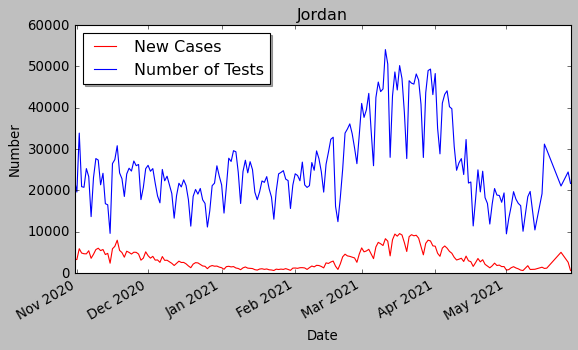

In [96]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib as mpl
mpl.style.use('classic')
#plt.style.use('seaborn')
fig, ax1 = plt.subplots()
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Jordan")
plt.grid(False)

#ax=plt.gca()
ax1.set_ylim([0,60000])

ax1.set_facecolor("white")
ax1.set_box_aspect(0.5)
ax1.plot(dataJordan["new_cases"],label="New Cases", color='red')
ax1.plot(dataJordan["new_tests"],label="Number of Tests")
ax1.legend(loc=2,shadow=True)
plt.savefig("Jordan.png")
plt.show()



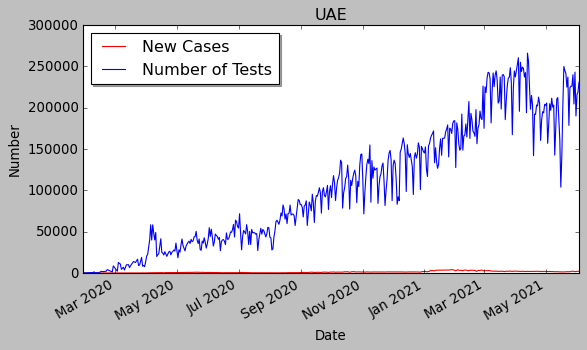

In [97]:
mpl.style.use('classic')
#plt.style.use('seaborn')
fig, ax1 = plt.subplots()
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("UAE")
plt.grid(False)

#ax=plt.gca()
ax1.set_ylim([0,300000])

ax1.set_facecolor("white")
ax1.set_box_aspect(0.5)
ax1.plot(dataUAE["new_cases"],label="New Cases", color='red')
ax1.plot(dataUAE["new_tests"],label="Number of Tests")
ax1.legend(loc=2,shadow=True)
plt.savefig("UAE.png")
plt.show()

In [58]:
dataJordan["Proportion"]=dataJordan["new_cases"].divide(dataJordan["new_tests"])

<ipython-input-58-3b05e387fe56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataJordan["Proportion"]=dataJordan["new_cases"].divide(dataJordan["new_tests"])


In [59]:
dataJordan.shape

(198, 4)

In [60]:
dataJordan.head()

,new_cases,new_tests,Country,Proportion
date,,,,
2020-10-31,3301.0,22513.0,Jordan,0.146626
2020-11-01,3259.0,19588.0,Jordan,0.166377
2020-11-02,5877.0,33846.0,Jordan,0.173639
2020-11-03,4833.0,20887.0,Jordan,0.231388
2020-11-04,4658.0,20737.0,Jordan,0.224623


KeyError: ('new_tests', 'new_cases')

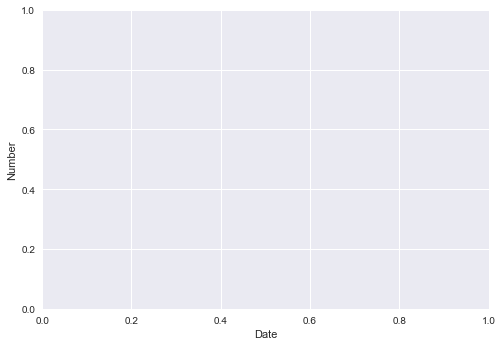

In [25]:
plt.xlabel('Date')
plt.ylabel('Number')

<AxesSubplot:xlabel='date'>

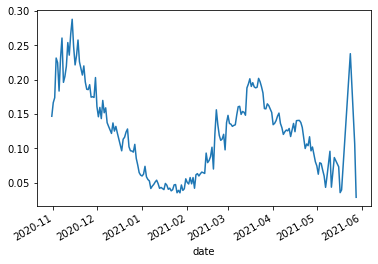

In [62]:
dataJordan["Proportion"].plot()

In [63]:
dataUAE["Proportion"]=dataUAE["new_cases"].divide(dataUAE["new_tests"])

<ipython-input-63-9e850fb25f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUAE["Proportion"]=dataUAE["new_cases"].divide(dataUAE["new_tests"])


<AxesSubplot:xlabel='date'>

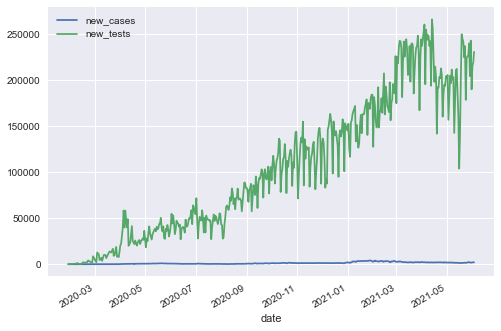

In [17]:
dataUAE.plot()

In [65]:
dataJordan.index

DatetimeIndex(['2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-11-08', '2020-11-09',
               ...
               '2021-05-08', '2021-05-10', '2021-05-11', '2021-05-13',
               '2021-05-16', '2021-05-17', '2021-05-18', '2021-05-24',
               '2021-05-27', '2021-05-28'],
              dtype='datetime64[ns]', name='date', length=198, freq=None)

[Text(0.5, 0, 'Date')]

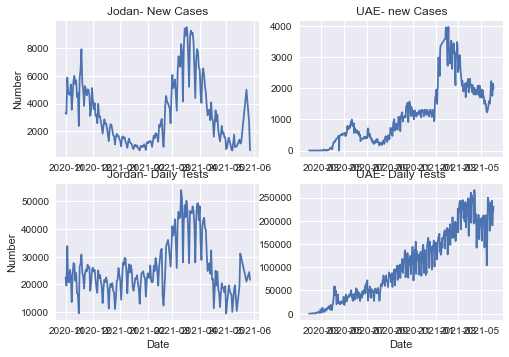

In [33]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(dataJordan["new_cases"])
axs[0, 0].set_title('Jodan- New Cases')
axs[0,0].set( ylabel='Number')
axs[0, 1].plot(dataUAE["new_cases"])
axs[0, 1].set_title('UAE- new Cases')
axs[1, 0].plot(dataJordan["new_tests"])
axs[1, 0].set_title('Jordan- Daily Tests')
axs[1,0].set( xlabel='Date',ylabel='Number')
axs[1, 1].plot(dataUAE["new_tests"])
axs[1, 1].set_title('UAE- Daily Tests')
axs[1,1].set( xlabel='Date')